In [1]:
df_1 = [['P1',10,5],
        ['P2',29,1],
        ['P3',3,3],
        ['P4',7,4],
        ['P5',12,2]]

[['P1', 10, 5], ['P2', 29, 1], ['P3', 3, 3], ['P4', 7, 4], ['P5', 12, 2]]

In [2]:
df_2 = [['P1',2,2],
        ['P2',1,1],
        ['P3',8,4],
        ['P4',4,2],
        ['P5',5,3]]

[['P1', 2, 2], ['P2', 1, 1], ['P3', 8, 4], ['P4', 4, 2], ['P5', 5, 3]]

In [3]:
def FCFS(df):
    ET = []
    for i in range(len(df)):
        # first process
        if(i==0):
            ET.append(df[i][1])

        # get prevET + newBT
        else:
            ET.append(ET[i-1] + df[i][1])
            
        
        
    # TAT는 Turn Around time
    TAT = []
    for i in range(len(df)):
        TAT.append(ET[i]) # arrival time이 없기 때문에, Turn Around Time은 Exit time이 된다.       
        
        
    # WT는 Wait time
    WT = []
    for i in range(len(df)):
        WT.append(TAT[i] - df[i][1]) # d[i][1][0] 은 버스트 시간을 의미한다.        
        
        
        
    # 평균 Wait time 구하기
    avg_WT = 0
    for i in WT:
        avg_WT +=i
    avg_WT = (avg_WT/5)
    
    
    # 출력
    print("FCFS 스케줄링 알고리즘")
    print("Processes    Burst Time     Waiting", "Time    Turn-Around Time")
    for i in range(5):
          print(" ", df[i][0],"\t\t",df[i][1],"\t\t", WT[i],"\t\t",TAT[i],"\t\t")
    print("Average Waiting Time: ",avg_WT)
    print('\n')
    
    
    # 평균 대기 시간 반환
    return avg_WT

In [12]:
def RR(df):
    
    def findWaitingTime(processes, n, bt, wt, quantum):
        rem_bt = [0] * n
 
        # Copy the burst time into rem_bt[]
        for i in range(n):
            rem_bt[i] = bt[i]

        t = 0 # Current time
        while(1):
            done = True

            for i in range(n):

                if (rem_bt[i] > 0) :
                    done = False

                    if (rem_bt[i] > quantum) :

                        t += quantum
                        rem_bt[i] -= quantum

                    else:

                        t = t + rem_bt[i]

                        wt[i] = t - bt[i]

                        rem_bt[i] = 0

            # If all processes are done
            if (done == True):
                break
                       
    def findTurnAroundTime(processes, n, bt, wt, tat):
     
        # Calculating turnaround time
        for i in range(n):
            tat[i] = bt[i] + wt[i]
          
    # Function to calculate average waiting
    def findavgTime(processes, n, bt, quantum):
        wt = [0] * n
        tat = [0] * n

        # Function to find waiting time
        # of all processes
        findWaitingTime(processes, n, bt,wt, quantum)

        # Function to find turn around time
        # for all processes
        findTurnAroundTime(processes, n, bt,wt, tat)

        # Display processes along with all details
        print("RR 스케줄링 알고리즘")
        print("Processes    Burst Time     Waiting", "Time    Turn-Around Time")
        
        total_wt = 0
        total_tat = 0
        
        for i in range(n):
            total_wt = total_wt + wt[i]
            print(" ", processes[i], "\t\t", bt[i], "\t\t", wt[i], "\t\t", tat[i])

        print("\nAverage waiting time = %.5f "%(total_wt /n) )
        print('\n')
        
        # 평균 대기 시간 반환
        return total_wt/n       
        
    # Driver code
    if __name__ =="__main__":

        # Process id's
        proc = list()
        for i in range(len(df)):
            proc.append(df[i][0])

        # Burst time of all processes
        burst_time = list()
        for i in range(len(df)):
            burst_time.append(df[i][1])

        # Time quantum
        quantum = 2;
        avg_WT = findavgTime(proc, len(df), burst_time, quantum)
        
        return avg_WT


In [13]:
def SJF(df):
    d = dict()

    for i in range(len(df)):
        key = df[i][0]
        l = list()
        l.append(df[i][1])
        d[key] = l
       
    d = sorted(d.items(), key=lambda item: item[1][0])
    
    
    ET = []
    for i in range(len(d)):
        # first process
        if(i==0):
            ET.append(d[i][1][0])

        # get prevET + newBT
        else:
            ET.append(ET[i-1] + d[i][1][0])
            
       
    
    # TAT는 Turn Around time
    TAT = []
    for i in range(len(d)):
        TAT.append(ET[i]) # arrival time이 없기 때문에, Turn Around Time은 Exit time이 된다.
        
        
        
    # WT는 Wait time
    WT = []
    for i in range(len(d)):
        WT.append(TAT[i] - d[i][1][0]) # d[i][1][0] 은 버스트 시간을 의미한다.
        
 

    # 평균 Wait time 구하기
    avg_WT = 0
    for i in WT:
        avg_WT +=i
    avg_WT = (avg_WT/5)
    

    
    # 출력
    print("SJF 스케줄링 알고리즘")
    print("Processes    Burst Time     Waiting", "Time    Turn-Around Time")
    for i in range(5):
          print(" ", d[i][0],"\t\t",d[i][1][0],"\t\t", WT[i],"\t\t",TAT[i],"\t\t")
    print("Average Waiting Time: ",avg_WT)
    print('\n')
    
    return avg_WT

In [14]:
def priority(df) :
    
    d = dict()

    for i in range(5):
        key = df[i][0]
        l = list()
        l.append(df[i][1])
        l.append(df[i][2])
        d[key] = l
        
    d = sorted(d.items(), key=lambda item: item[1][1])
        

    ET = []
    for i in range(len(d)):
        # first process
        if(i==0):
            ET.append(d[i][1][0])

        # get prevET + newBT
        else:
            ET.append(ET[i-1] + d[i][1][0])
            
            
    # TAT는 Turn Around time
    TAT = []
    for i in range(len(d)):
        TAT.append(ET[i]) # arrival time이 없기 때문에, Turn Around Time은 Exit time이 된다.
        
        
        
    # WT는 Wait time
    WT = []
    for i in range(len(d)):
        WT.append(TAT[i] - d[i][1][0]) # d[i][1][0] 은 버스트 시간을 의미한다.
        
        
    # 평균 Wait time 구하기
    avg_WT = 0
    for i in WT:
        avg_WT +=i
    avg_WT = (avg_WT/5)
    
    
    # 출력
    print("Priority 스케줄링 알고리즘")
    print("Processes    Priority    Burst Time     Waiting", "Time    Turn-Around Time")
    for i in range(5):
          print(" ", d[i][0],"\t\t",d[i][1][1],"\t\t",d[i][1][0],"\t\t", WT[i],"\t\t",TAT[i],"\t\t")
    print("Average Waiting Time: ",avg_WT)
    print('\n')
    
    return avg_WT

In [15]:
if __name__ =="__main__":
    print("1번 프로세스 집합 \n")
    proc1_avg_fcfs = FCFS(df_1)
    proc1_avg_rr = RR(df_1)
    proc1_avg_sjf = SJF(df_1)
    proc1_avg_prio = priority(df_1)
    
    
    print("2번 프로세스 집합 \n")
    proc2_avg_fcfs = FCFS(df_2)
    proc2_avg_rr = RR(df_2)
    proc2_avg_sjf = SJF(df_2)
    proc2_avg_prio = priority(df_2)

1번 프로세스 집합 

FCFS 스케줄링 알고리즘
Processes    Burst Time     Waiting Time    Turn-Around Time
  P1 		 10 		 0 		 10 		
  P2 		 29 		 10 		 39 		
  P3 		 3 		 39 		 42 		
  P4 		 7 		 42 		 49 		
  P5 		 12 		 49 		 61 		
Average Waiting Time:  28.0


RR 스케줄링 알고리즘
Processes    Burst Time     Waiting Time    Turn-Around Time
  P1 		 10 		 26 		 36
  P2 		 29 		 32 		 61
  P3 		 3 		 12 		 15
  P4 		 7 		 25 		 32
  P5 		 12 		 32 		 44

Average waiting time = 25.40000 


SJF 스케줄링 알고리즘
Processes    Burst Time     Waiting Time    Turn-Around Time
  P3 		 3 		 0 		 3 		
  P4 		 7 		 3 		 10 		
  P1 		 10 		 10 		 20 		
  P5 		 12 		 20 		 32 		
  P2 		 29 		 32 		 61 		
Average Waiting Time:  13.0


Priority 스케줄링 알고리즘
Processes    Priority    Burst Time     Waiting Time    Turn-Around Time
  P2 		 1 		 29 		 0 		 29 		
  P5 		 2 		 12 		 29 		 41 		
  P3 		 3 		 3 		 41 		 44 		
  P4 		 4 		 7 		 44 		 51 		
  P1 		 5 		 10 		 51 		 61 		
Average Waiting Time:  33.0


2번 프로세스 집합 

FCFS 스케줄링 알고리즘

In [16]:
import pandas as pd
import matplotlib.pyplot as plt


# 한글 폰트 깨짐 방지
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

data={'스케줄링 알고리즘': ['FCFS','RR','SJF','Priority'],
      '1번 프로세스 평균 대기 시간': [proc1_avg_fcfs, proc1_avg_rr, proc1_avg_sjf, proc1_avg_prio],
      '2번 프로세스 평균 대기 시간': [proc2_avg_fcfs, proc2_avg_rr, proc2_avg_sjf, proc2_avg_prio]}
df = pd.DataFrame(data)

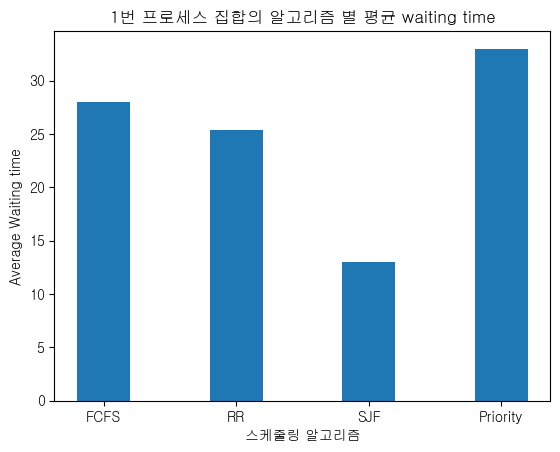

In [18]:
plt.title('1번 프로세스 집합의 알고리즘 별 평균 waiting time')
plt.bar(df['스케줄링 알고리즘'], df['1번 프로세스 평균 대기 시간'], width=0.4)
plt.xlabel('스케줄링 알고리즘')
plt.ylabel('Average Waiting time')

plt.show()

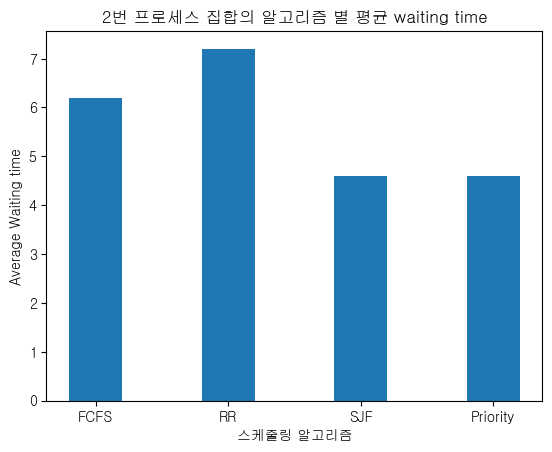

In [19]:
plt.title('2번 프로세스 집합의 알고리즘 별 평균 waiting time')
plt.bar(df['스케줄링 알고리즘'], df['2번 프로세스 평균 대기 시간'], width=0.4)
plt.xlabel('스케줄링 알고리즘')
plt.ylabel('Average Waiting time')

plt.show()